
### Getting the data ready to be used with ML

    (1) Split data into features and labels

    (2) Filling/handling missing values
    
    (3) Converting nonnumerical values to numerical values (Feature Encoding)
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


### Making sure all our data is numerical

In [4]:
car = pd.read_csv('car-sales-extended.csv')

In [5]:
car.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [6]:
len(car)

1000

In [7]:
car.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [8]:
# Split to data and labels
X = car.drop("Price",axis=1)
Y = car["Price"]

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
# Build Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

#This will give an error as we have categorical columns in our data

C:\Users\SAN.000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Honda'

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#get the columns which are categorical
#Though doors is Numerical, we can assume those as categories
categorical_columns = ["Make","Colour","Doors"]

#Once Hot encoding will convert Categorical columns to Numerica, 
#By careting '1' for that category, and '0' for other category for each row
onehot_encoder = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",onehot_encoder,categorical_columns)],remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [13]:
dummies = pd.get_dummies(car)

In [14]:
# Fit the model
np.random.seed(2)

X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y,test_size=0.2)

model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
model.score(X_test,Y_test)

0.3386893660741821

## Handling Missing values
    (1) Either fill those values
    (2) Remove the values

In [16]:
car_mis = pd.read_csv('car-sales-extended-missing-data.csv')
car_mis.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [17]:
car_mis.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

# Option 1 : Filling missing values

In [18]:
car_mis["Make"].fillna("missing",inplace=True)

car_mis["Colour"].fillna("missing",inplace=True)

car_mis["Odometer (KM)"].fillna(car_mis["Odometer (KM)"].mean(),inplace=True)

car_mis["Doors"].fillna(4,inplace=True)

In [19]:
car_mis.isnull().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [20]:
car_mis.dropna(inplace=True)

In [21]:
len(car_mis)

950

In [22]:
# Split to data and labels
X = car_mis.drop("Price",axis=1)
Y = car_mis["Price"]

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#get the columns which are categorical
#Though doors is Numerical, we can assume those as categories
categorical_columns = ["Make","Colour","Doors"]

#Once Hot encoding will convert Categorical columns to Numerica, 
#By careting '1' for that category, and '0' for other category for each row
onehot_encoder = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",onehot_encoder,categorical_columns)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_mis)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2:  Fill missing values wit Scikit learn

In [24]:
car_mis = pd.read_csv('car-sales-extended-missing-data.csv')
car_mis.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [25]:
car_mis.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
car_mis.dropna(subset=["Price"],inplace=True)
car_mis.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
X = car_mis.drop("Price",axis=1)
Y = car_mis["Price"]

In [28]:
# Fill missing values with Scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill missing values
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [33]:
carsales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])

In [34]:
carsales_filled.isnull().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

## Choosing the rigt Estimator

## https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [14]:
#Import Boston Data
from sklearn.datasets import load_boston
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [15]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
#Ridge Regression
from sklearn.linear_model import Ridge

np.random.seed(2)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

#Instantiate Ridge Model
model = Ridge()
model.fit(X_train,Y_train)

model.score(X_test,Y_test)

0.7734102322760741

In [60]:
# Can we improve this score ?????

In [69]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(2)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)

rf.score(X_test,Y_test)

Y_predds = rf.predict(X_test)

In [70]:
# Compare the predictions
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_preds)

2.0735196078431373

### Evaluating a Model

https://scikit-learn.org/stable/modules/model_evaluation.html 

Three ways to evaluate a model

    (1) Estimator `score` method     
    (2) The `scoring` parameter    
    (3) Problem-specific metric functions

In [2]:
hd = pd.read_csv('heart-disease.csv')

from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X = hd.drop("target",axis=1)
Y = hd["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
# Score Method
clf.score(X_test,Y_test)

0.8852459016393442

In [2]:
# Scoring Parameter
from sklearn.model_selection import cross_val_score

hd = pd.read_csv('heart-disease.csv')

from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X = hd.drop("target",axis=1)
Y = hd["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
clf.score(X_test,Y_test)

0.8852459016393442

In [78]:
cross_val_score(clf,X,Y)

C:\Users\SAN.000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.81188119, 0.82178218, 0.77227723])

In [81]:
np.random.seed(2)

#Single training and test split score
clf_single_score = clf.score(X_test,Y_test)

#Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,Y,cv=5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8852459016393442, 0.8215846994535518)

### Classification model evaluation metrics
    (1) Accuracy
    (2) Area under ROC Curve
    (3) Confusion Matrix
    (4) Classification report
   

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X = hd.drop("target",axis=1)
Y = hd["target"]

clf = RandomForestClassifier(n_estimators=100)
corss_val_score = cross_val_score(clf,X,Y,cv=5)

In [92]:
np.mean(corss_val_score)

0.8215846994535518

** Area under the Receiver operating characteristci curve (AUC/ROC) **

ROC curves are a comparision of a model's true positive raate (tpr) versus a models false positive rate (fpr)

    True Positive - model predicts 1 when truth is 1 
    False postive - model predicts 1 when truth is 0
    True  Negative - model predicts 0 when truth is 0
    False Negative - model predicts 0 when truth is 1

In [94]:
from sklearn.metrics import roc_curve

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf.fit(X_train,Y_train)

#make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.22, 0.78],
       [0.66, 0.34],
       [0.23, 0.77],
       [0.56, 0.44],
       [0.94, 0.06],
       [0.03, 0.97],
       [0.11, 0.89],
       [0.63, 0.37],
       [0.43, 0.57],
       [0.42, 0.58]])

In [95]:
y_probs_positive = y_probs[:,1]

In [98]:
fpr,tpr,thresholds = roc_curve(Y_test,y_probs_positive)
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.04545455,
        0.04545455, 0.04545455, 0.04545455, 0.09090909, 0.09090909,
        0.09090909, 0.13636364, 0.13636364, 0.22727273, 0.22727273,
        0.27272727, 0.31818182, 0.31818182, 0.54545455, 0.81818182,
        1.        ]),
 array([0.        , 0.02564103, 0.1025641 , 0.15384615, 0.17948718,
        0.23076923, 0.30769231, 0.41025641, 0.51282051, 0.51282051,
        0.64102564, 0.69230769, 0.74358974, 0.74358974, 0.79487179,
        0.87179487, 0.87179487, 0.8974359 , 0.8974359 , 0.94871795,
        0.97435897, 0.97435897, 1.        , 1.        , 1.        ,
        1.        ]),
 array([1.98, 0.98, 0.97, 0.96, 0.95, 0.93, 0.9 , 0.89, 0.82, 0.78, 0.72,
        0.67, 0.61, 0.59, 0.58, 0.54, 0.53, 0.52, 0.44, 0.37, 0.34, 0.32,
        0.31, 0.11, 0.08, 0.  ]))

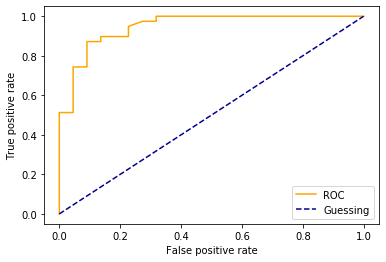

In [103]:
# Create a plot for ROC Curve

import matplotlib.pyplot as plt

def plot_roc(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    plt.plot([0,1],[0,1], color="darkblue",linestyle="--",label="Guessing")
    
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()
    plt.show();
    
plot_roc(fpr,tpr)

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

0.9481351981351981

## Confusion Matrix

A confusion matrix is a way to compare the label a model predicts the actual labels it was supposed to predict

In [105]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test,y_preds)

array([[19,  3],
       [ 4, 35]], dtype=int64)

In [107]:
pd.crosstab(Y_test,y_preds,
           rownames=["Actual"],
           colnames=["Predicted"])

Predicted,0,1
Actual,,
0,19,3
1,4,35


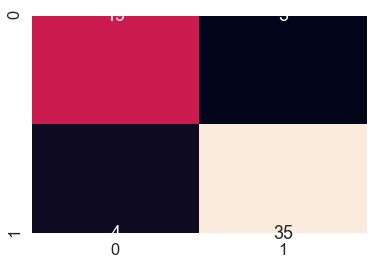

In [112]:
import seaborn as sns
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(Y_test,y_preds)

sns.heatmap(conf_mat,annot=True,cbar=False);

### Classification Report

In [113]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.92      0.90      0.91        39

    accuracy                           0.89        61
   macro avg       0.87      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### regression model evaluation metriccs

https://scikit-learn.org/stable/modules/model_evaluation.html 

    R^2 (r-squared) coefficient of determination
    Mean absolute error (MAE)
    Mean absolute error (MSE)

In [117]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(2)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [118]:
model.score(X_test,Y_test)

0.9033120414306451

In [120]:
from sklearn.metrics import r2_score

Y_test_mean = np.full(len(Y_test),Y_test.mean())

In [121]:
r2_score(Y_test,Y_test_mean)

0.0

### Mean absolute error
Average of absloute differenes between predictions and actual values

In [125]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_preds)
mae

2.0735196078431373

In [127]:
df = pd.DataFrame(data={"actual values":Y_test,
                       "predicted values": y_preds})
df["Differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,Differences
463,20.2,21.325,1.125
152,15.3,20.838,5.538
291,37.3,33.208,-4.092
183,32.5,30.683,-1.817
384,8.8,8.011,-0.789
...,...,...,...
200,32.9,34.489,1.589
12,21.7,20.845,-0.855
129,14.3,16.126,1.826
194,29.1,28.913,-0.187


### Mean Squared Error


In [128]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test,y_preds)
mse

8.088883852941176

In [130]:
squared = np.square(df["Differences"])
squared.mean()

8.088883852941178

### Scoring Parameter

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)

X = hd.drop("target",axis=1)
Y = hd["target"]

clf = RandomForestClassifier(n_estimators=100)


In [4]:
np.random.seed(2)
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring=None)
cv_acc

array([0.85245902, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

In [5]:
print(f'The cross validate accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross validate accuracy is 82.16%


In [6]:
np.random.seed(2)
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
print(f'The cross validate accuracy is {np.mean(cv_acc)*100:.2f}%')

The cross validate accuracy is 82.16%


In [8]:
cv_precision = cross_val_score(clf,X,Y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8273144919112662

In [10]:
cv_recall = cross_val_score(clf,X,Y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8303030303030303

In [11]:
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8333677433677436

## Evaluation for Regression Model

In [17]:
np.random.seed(2)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

In [19]:
np.random.seed(2)
cv_r2 = cross_val_score(model,X,Y,cv=5,scoring=None)
np.mean(cv_r2)

0.6361511339577539

In [20]:
np.random.seed(2)
cv_r2 = cross_val_score(model,X,Y,cv=5,scoring="r2")
np.mean(cv_r2)

0.6361511339577539

In [21]:
np.random.seed(2)
cv_mae = cross_val_score(model,X,Y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_r2)

0.6361511339577539

In [23]:
np.random.seed(2)
cv_mse = cross_val_score(model,X,Y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-20.626146936672477

## Scikit-Learn Metric Functions

In [28]:
## Classification Metric Functions

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(2)

X = hd.drop("target",axis=1)
Y = hd["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

y_preds = clf.predict(X_test)

print(f"accuracy : {accuracy_score(Y_test,y_preds)*100:.2f}%")

print(f"Precision : {precision_score(Y_test,y_preds)}")
print(f"Recall : {recall_score(Y_test,y_preds)}")
print(f"F1 : {f1_score(Y_test,y_preds)}")


accuracy : 88.52%
Precision : 0.8235294117647058
Recall : 0.9655172413793104
F1 : 0.888888888888889


In [32]:
## Regression Metric Functions

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,Y_train)

y_preds = model.predict(X_test)

print(f"R^2: {r2_score(Y_test,y_preds)}")
print(f"Mean Absolute Error: {mean_absolute_error(Y_test,y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test,y_preds)}")


R^2: 0.8252036818259056
Mean Absolute Error: 2.2168137254901965
Mean Squared Error: 9.0092092254902


### Improving the Model

First model is Baseline model
